# Import necessary libraries

In [1]:
#Pandas and plotting tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from random import sample

# Organize the data

## Organize the batches

In [2]:
# List of NNs
NN_list = ["MINI", 'STD']

# List of Datasets
dataset_list = ["C&D", "ECHO", "MNIST"]

# Architectures
architectures = ["PL", "FL", "SL", "PSL", "FSL"]

# Number of epochs
epochs = 4

# Path to where batch times from the implementations are stored
implementation_batch_path = r"/media/wilfredo/Willie931GB/EURECOM_SLU_Linux/II_SEMESTER/SLU/PAPER_KDD2022/EXPERIMENTS/PySyft/IMPLEMENTATION/Batch_times/"
simulation_batch_path = r"/media/wilfredo/Willie931GB/EURECOM_SLU_Linux/II_SEMESTER/SLU/PAPER_KDD2022/EXPERIMENTS/Simulators_Python_3.7.3/Results/Testbed/"
output_path = r"/media/wilfredo/Willie931GB/EURECOM_SLU_Linux/II_SEMESTER/SLU/PAPER_KDD2022/EXPERIMENTS/Simulators_Python_3.7.3/Results/Testbed/Organized_data/"

# Our initial empty list
data = []

# Random samples / batches
n = 25

for NN in NN_list:
    for dataset in dataset_list:
        data = []
        for architecture in architectures:
            for i in range(epochs):
                #######################################################################
                # START EPOCH FOR LOOP
                # Take the batch times from all epochs from the IMPLEMENTATIONS
                # Read the CSV file
                implem_batches = pd.read_csv(implementation_batch_path
                                              + NN + "_" 
                                              + dataset + "_" 
                                              + architecture + "_epoch_"
                                              + str(i) + ".csv")
#                 print(implem_batches)
                # For the first epoch, create the list. Otherwise, append to it
                if i == 0:
            #                     first_column = []
                    # Turn the CSV to a list and choose 25 random samples from this list.
                    # This is your first column
                    first_column = sample(implem_batches.iloc[:,1].to_list(), n)
                else:
                    first_column.extend(sample(implem_batches.iloc[:,1].to_list(), n))

                # Convert all elements in the list to floats
            #                 print("i = ", i)
                for element in first_column:
                    element = float(element)
#                 print(first_column)
                # END OF EPOCH FOR LOOP!
                #######################################################################

            # OUTSIDE THE EPOCH FOR LOOP
            # Add the randomly chosen batch samples column to the main data list
            data.append(first_column)
#             print ("Length of first column = ", len(data[0]))

            # For the same set of variables as above, I want to get the info from the SIMULATOR times
            # Now repeat the procedure to get the 25 random samples from the SIMULATIONS
            # Read the dataframe
            sim_batches = pd.read_csv(simulation_batch_path + "NN_"
                                          + NN + "_" 
                                          + dataset + "_BATCHES.csv")
#             print("Reading data from: ", "NN_" + NN + "_" + dataset + "_BATCHES.csv")

            # Choose n random samples from list
            #                 print(sim_batches)
            second_column = sample(sim_batches[architecture + " Train Time [s]"].to_list(), n*epochs)
            
            # Convert all elements in the list to floats 
            for element in second_column:
                element = float(element)

            # Add the column to the list
            data.append(second_column)
#             print ("Length of second column = ", len(data[1]))
            
#             print(second_column)
            # print(len(data[1]))

            # Create the batch accuracy column
            third_column = []
            for i in range(len(first_column)):
                accuracy = 1 - abs(first_column[i] - second_column[i])/first_column[i]
                third_column.append(accuracy)
                
            # Add the column to the list
            data.append(third_column)
#             print ("Length of third column = ", len(data[2]))
            
#             print(third_column)
#             print("Length of data = ", len(data))

        # print(data)
        # df = pd.DataFrame(np.array(data).T)
        column_names = ["Testbed PL Batch Time [s]", "Simulator PL Batch Time [s]", "Simulator Accuracy PL", 
                        "Testbed FL Batch Time [s]", "Simulator FL Batch Time [s]", "Simulator Accuracy FL",
                        "Testbed SL Batch Time [s]", "Simulator SL Batch Time [s]", "Simulator Accuracy SL",
                        "Testbed PSL Batch Time [s]", "Simulator PSL Batch Time [s]", "Simulator Accuracy PSL",
                        "Testbed FSL Batch Time [s]", "Simulator FSL Batch Time [s]", "Simulator Accuracy FSL"
                       ]
        # Put the information into a dataframe. Create the empty dataframe, then fill it up
        df = pd.DataFrame(columns = column_names)
        for i in range(len(column_names)):
            df[column_names[i]] = data[i] 
        
        # Save the dataframe to disk
        df.to_csv(output_path + "batches_" + NN + "_" + dataset + ".csv")
#         print("df saved to: ", output_path + "batches_" + NN + "_" + dataset + ".csv")
#         print(df)

print("BATCHES ORGANIZED!")

BATCHES ORGANIZED!


## Organize the epochs

In [3]:
# List of NNs
NN_list = ["MINI", 'STD']

# List of Datasets
dataset_list = ["C&D", "ECHO", "MNIST"]

# Architectures
architectures = ["PL", "FL", "SL", "PSL", "FSL"]

# Number of epochs
epochs = 5

# Path to where batch times from the implementations are stored
implementation_epoch_path = r"/media/wilfredo/Willie931GB/EURECOM_SLU_Linux/II_SEMESTER/SLU/PAPER_KDD2022/EXPERIMENTS/PySyft/IMPLEMENTATION/Epoch_times/"
simulation_epoch_path = r"/media/wilfredo/Willie931GB/EURECOM_SLU_Linux/II_SEMESTER/SLU/PAPER_KDD2022/EXPERIMENTS/Simulators_Python_3.7.3/Results/Testbed/"
output_path = r"/media/wilfredo/Willie931GB/EURECOM_SLU_Linux/II_SEMESTER/SLU/PAPER_KDD2022/EXPERIMENTS/Simulators_Python_3.7.3/Results/Testbed/Organized_data/"

# Our initial empty list
data = []

for NN in NN_list:
    for dataset in dataset_list:
        data = []
        for architecture in architectures:
            # Read the Implementation CSV file
            implem_epochs = pd.read_csv(implementation_epoch_path
                                          + NN + "_" 
                                          + dataset + "_" 
                                          + architecture + ".csv")
            # Convert it to a list
            first_column = implem_epochs.iloc[:,1].to_list()
            
            # Convert all elements in the list to floats
            for element in first_column:
                element = float(element)
            
            # Add the epochs column to the main data list
            data.append(first_column)
#             print ("Length of first column = ", len(data[0]))

            # For the same set of variables as above, I want to get the info from the SIMULATOR times
            # Now repeat the procedure to get the 25 random samples from the SIMULATIONS
            # Read the dataframe
            sim_epochs = pd.read_csv(simulation_epoch_path + "NN_"
                                          + NN + "_" 
                                          + dataset + "_EPOCHS.csv")
#             print("Reading data from: ", "NN_" + NN + "_" + dataset + "_BATCHES.csv")
            
            second_column = sim_epochs[architecture + " Train Time [s]"].to_list()
    
            # Convert all elements in the list to floats 
            for element in second_column:
                element = float(element)

            # Add the column to the list
            data.append(second_column)
#             print ("Length of second column = ", len(data[1]))
            
#             print(second_column)
            # print(len(data[1]))

            # Create the batch accuracy column
            third_column = []
            for i in range(len(first_column)):
                accuracy = 1 - abs(first_column[i] - second_column[i])/first_column[i]
                third_column.append(accuracy)
                
            # Add the column to the list
            data.append(third_column)
#             print ("Length of third column = ", len(data[2]))
            
#             print(third_column)
#             print("Length of data = ", len(data))

        # print(data)
        # df = pd.DataFrame(np.array(data).T)
        column_names = ["Testbed PL Epoch Time [s]", "Simulator PL Epoch Time [s]", "Simulator Accuracy PL", 
                        "Testbed FL Epoch Time [s]", "Simulator FL Epoch Time [s]", "Simulator Accuracy FL",
                        "Testbed SL Epoch Time [s]", "Simulator SL Epoch Time [s]", "Simulator Accuracy SL",
                        "Testbed PSL Epoch Time [s]", "Simulator PSL Epoch Time [s]", "Simulator Accuracy PSL",
                        "Testbed FSL Epoch Time [s]", "Simulator FSL Epoch Time [s]", "Simulator Accuracy FSL"
                       ]
        # Put the information into a dataframe. Create the empty dataframe, then fill it up
        df = pd.DataFrame(columns = column_names)
        for i in range(len(column_names)):
            df[column_names[i]] = data[i] 
        
        # Save the dataframe to disk
        df.to_csv(output_path + "epochs_" + NN + "_" + dataset + ".csv")
#         print("df saved to: ", output_path + "batches_" + NN + "_" + dataset + ".csv")
#         print(df)

print("EPOCHS ORGANIZED!")

EPOCHS ORGANIZED!


# Obtain the data and create the boxplots

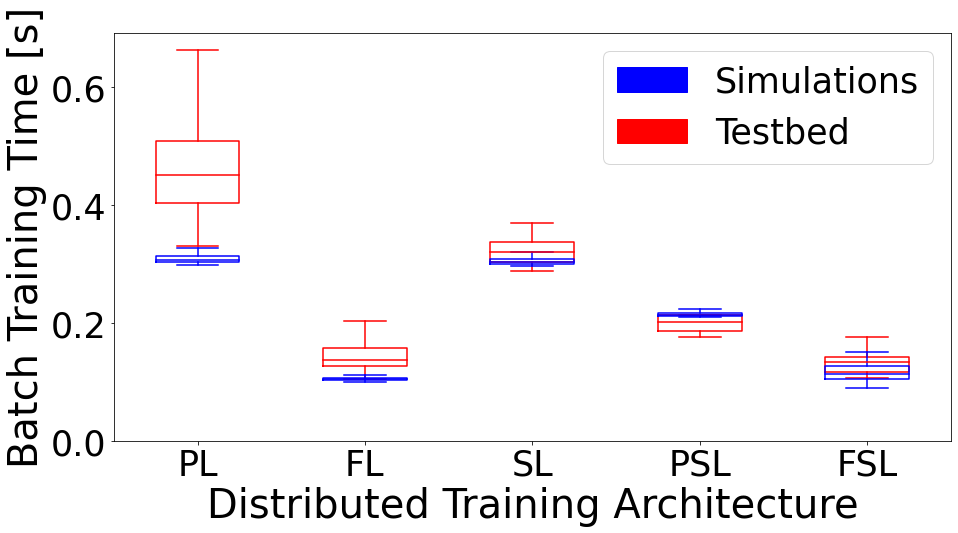

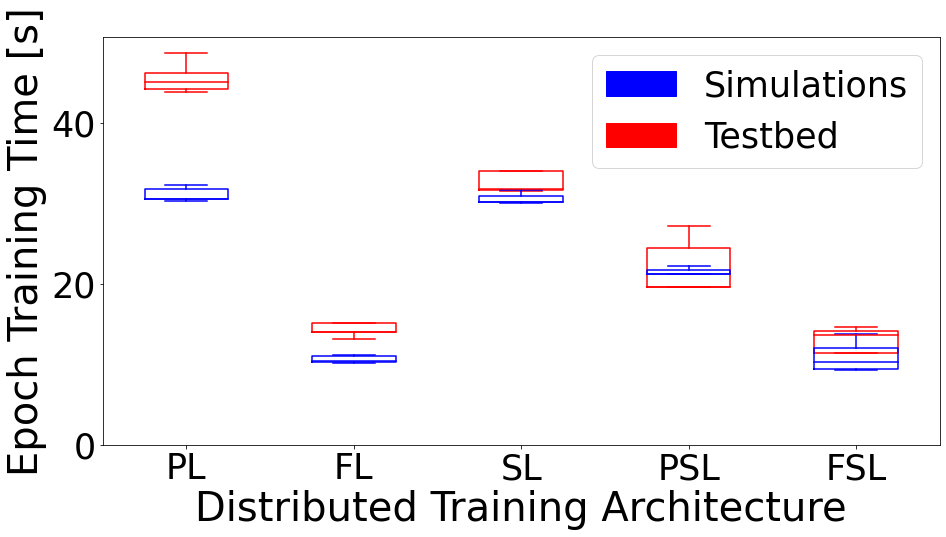

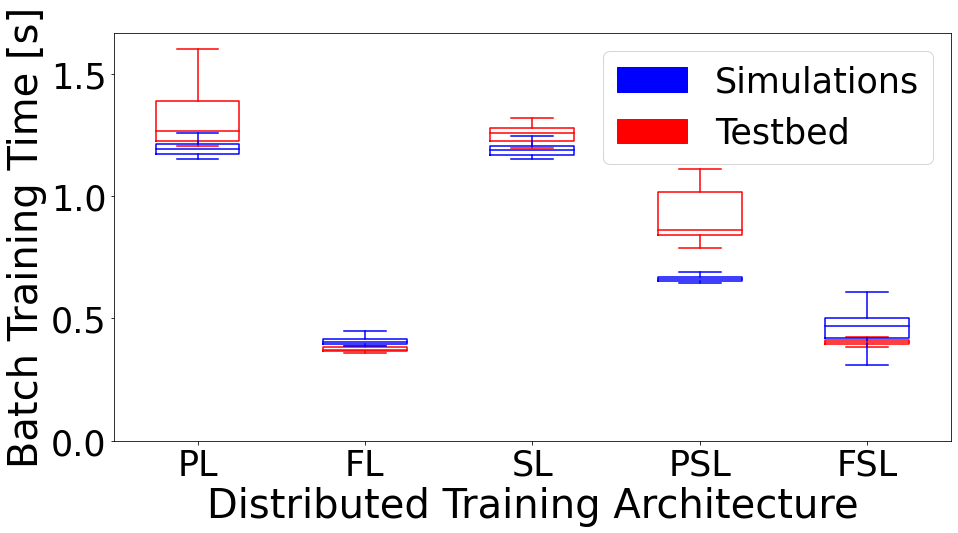

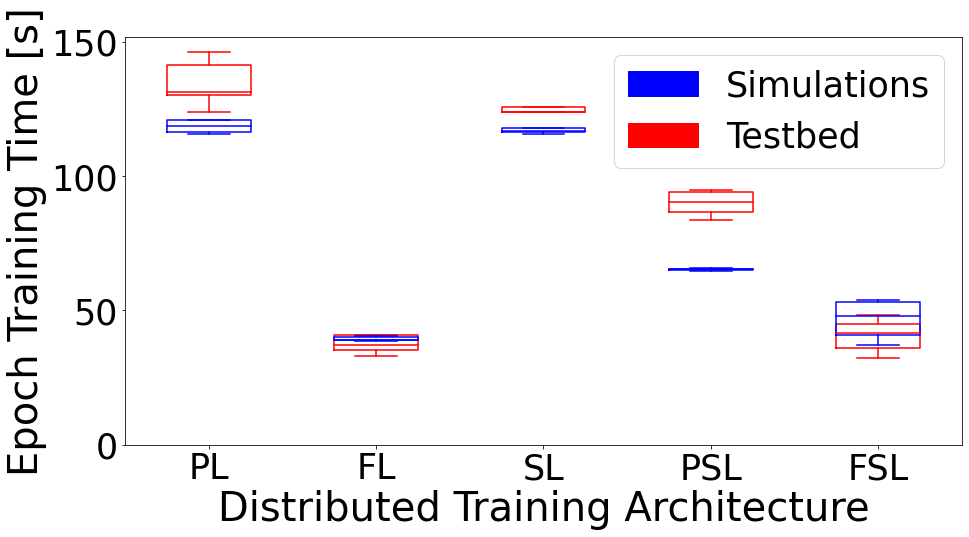

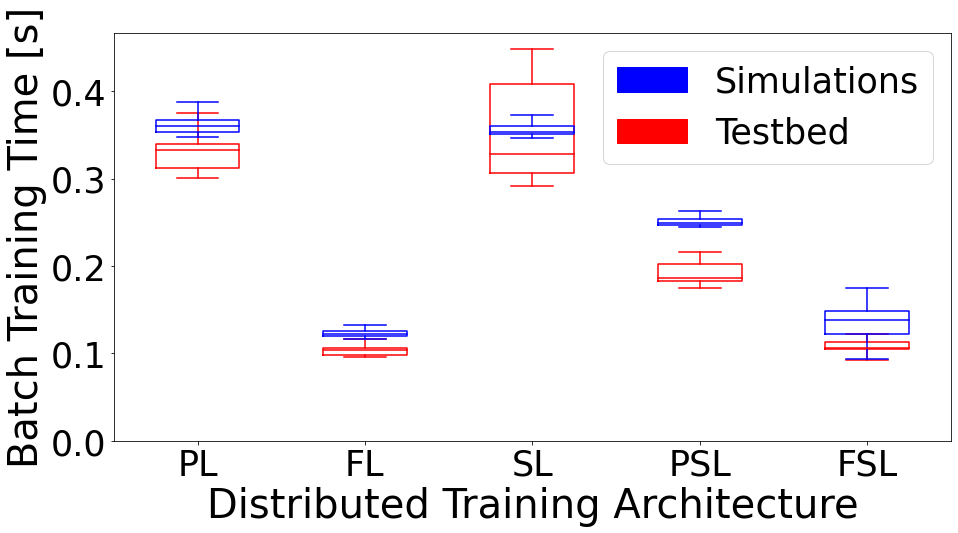

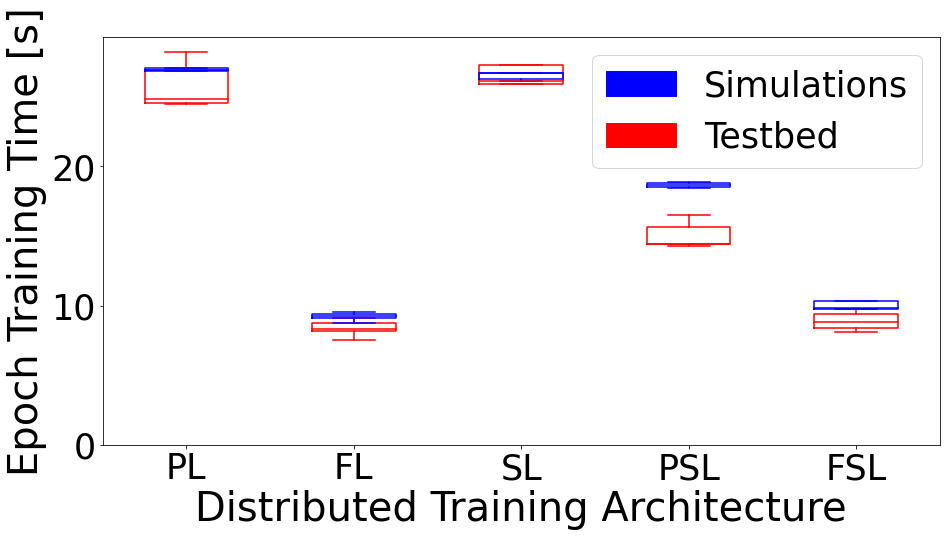

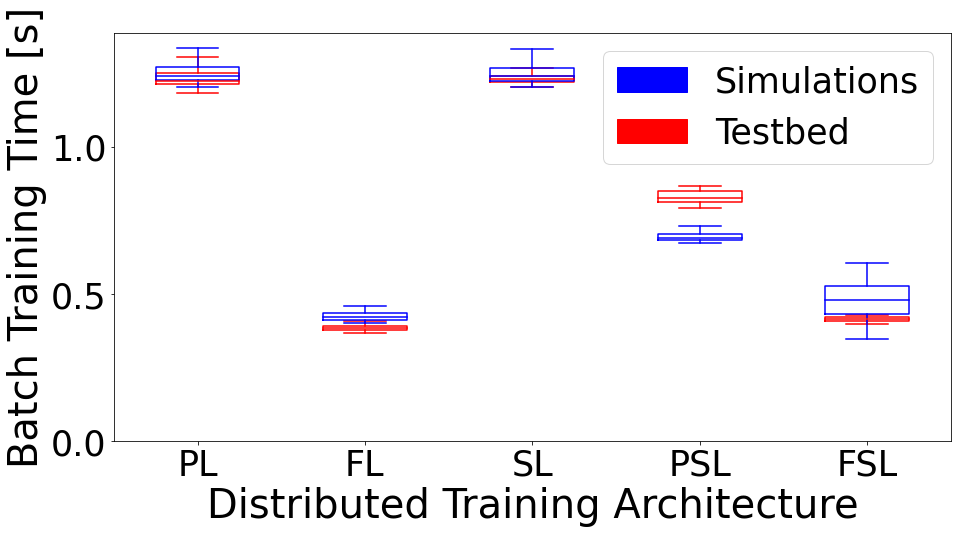

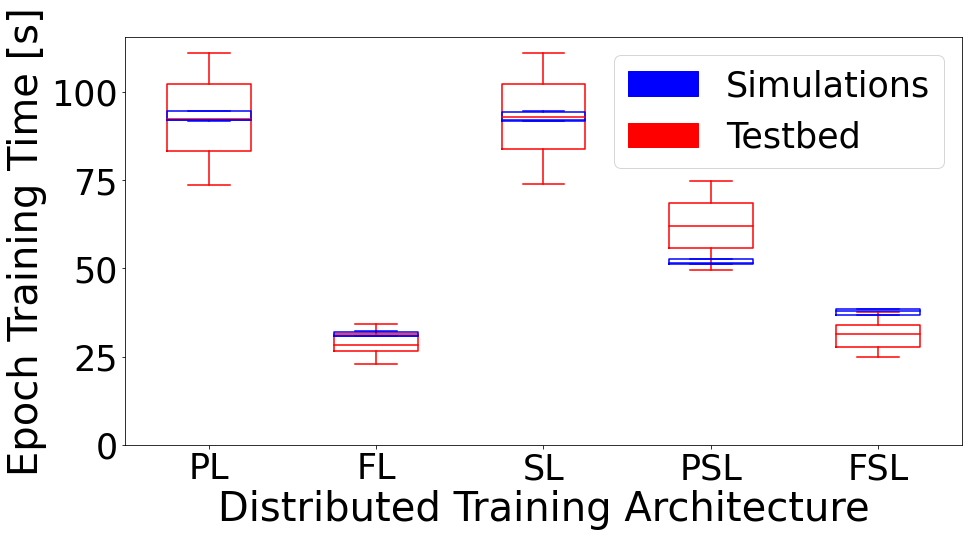

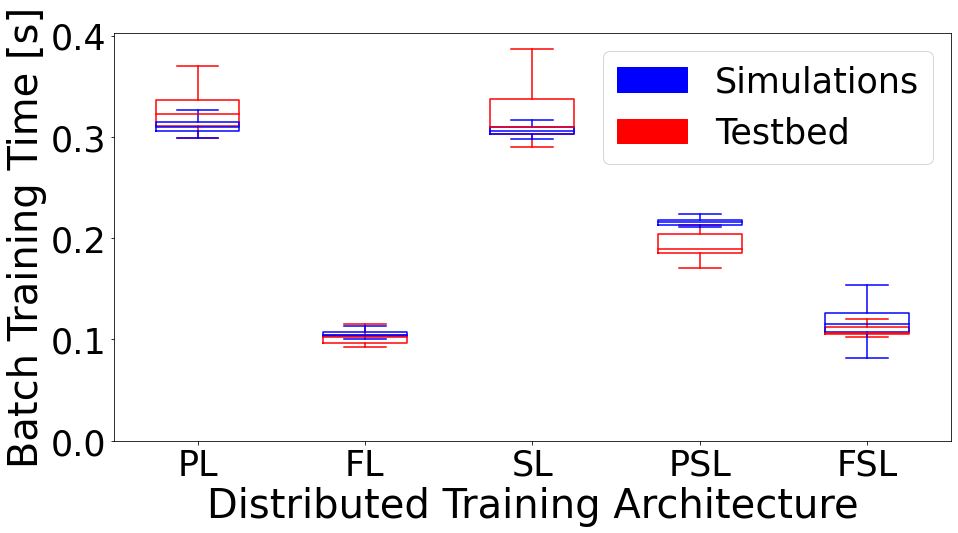

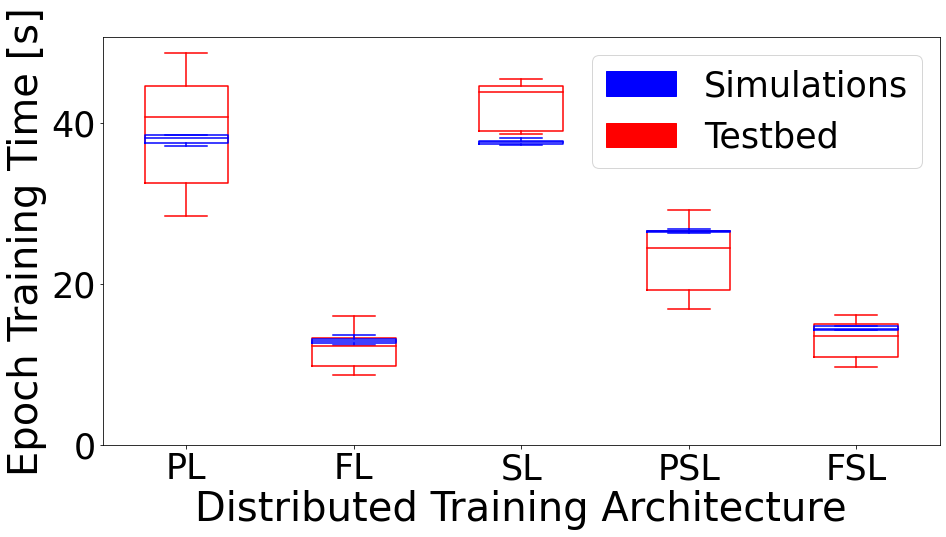

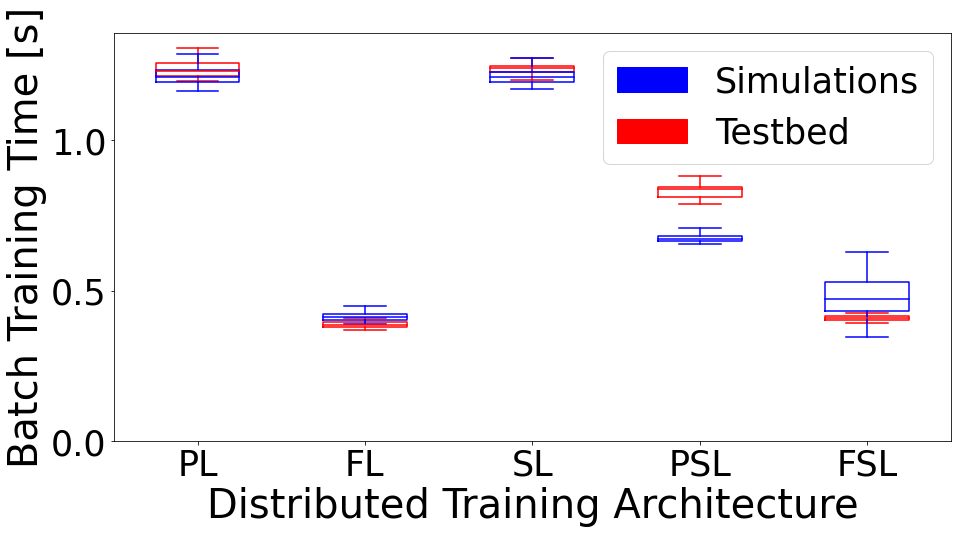

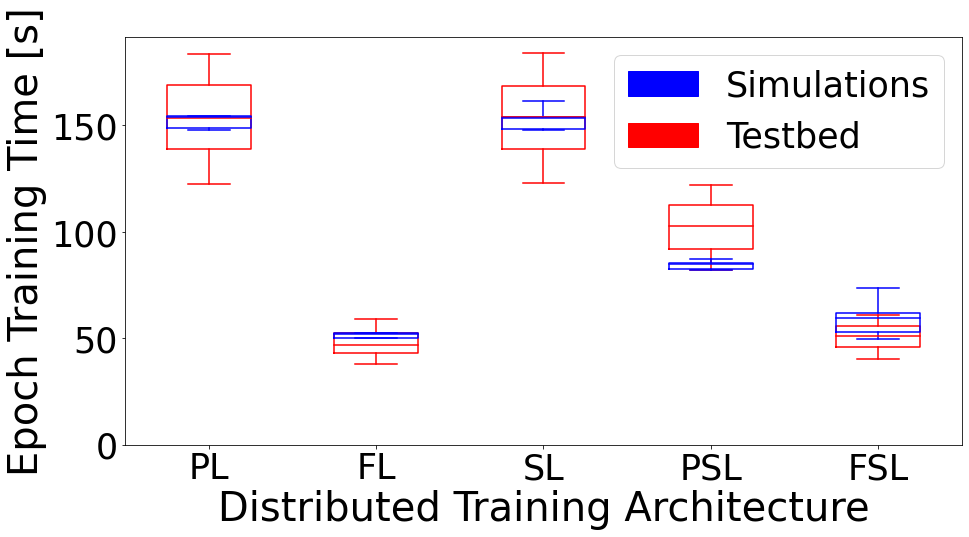

In [4]:
# Set the input directories
input_directory = r"/media/wilfredo/Willie931GB/EURECOM_SLU_Linux/II_SEMESTER/SLU/PAPER_KDD2022/EXPERIMENTS/Simulators_Python_3.7.3/Results/Testbed/Organized_data/"
output_directory = r"/media/wilfredo/Willie931GB/EURECOM_SLU_Linux/II_SEMESTER/SLU/PAPER_KDD2022/EXPERIMENTS/Simulators_Python_3.7.3/Results/Testbed/Organized_data/Boxplots/"

# Lists
NNs = ["MINI", "STD"]
# architectures = ["PL", "FL", "SL", "PSL", "FSL"]
datasets = ["MNIST", "C&D", "ECHO"]
plot_types = ["batches", "epochs"]

# Set your font sizes
font_size_axes = 40
font_size_ticks = 35
font_size_legend = 35

# Create the boxplots and save them
for dataset in datasets:
    for NN in NNs:
        for plot_type in plot_types:
            # Dimensions
            plt.figure(figsize = (15,7.5))

            # Set the name of the X axis
            plt.xlabel("Distributed Training Architecture", size = font_size_axes)

            # Set the name of the Y axis
            if plot_type == "batches":
                plt.ylabel("Batch Training Time [s]", size = font_size_axes)
            else:
                plt.ylabel("Epoch Training Time [s]", size = font_size_axes)
            
            # Read the data
            data = pd.read_csv(input_directory 
                               + plot_type + "_" 
                               + NN + "_" 
                               + dataset + ".csv")

            # Set the title of the plot
            # plt.title("Real Batch Training Time VS Simulated Batch Training Time", size = 20)
            # The following code will also put "both" boxplots (predicted and real) 
            # on the same x-tick

            # First make the boxplot, but return the axes... 
            color_testbed = 'r'
            color_simulator = 'b'
            line_width = 1.5
            if plot_type == "batches":
                ax = data.boxplot(column=['Testbed PL Batch Time [s]',
                                         'Testbed FL Batch Time [s]',
                                         'Testbed SL Batch Time [s]', 
                                         'Testbed PSL Batch Time [s]',
                                         'Testbed FSL Batch Time [s]'], 
                                         grid = False, 
                                         fontsize = font_size_ticks,
                                         showfliers = False,
                                         boxprops=dict(linestyle='-', linewidth=line_width, 
                                                       color = color_testbed),
                                         flierprops=dict(linestyle='-', linewidth=line_width, 
                                                       color = color_testbed),
                                         medianprops=dict(linestyle='-', linewidth=line_width, 
                                                       color = color_testbed),
                                         whiskerprops=dict(linestyle='-', linewidth=line_width, 
                                                       color = color_testbed),
                                         capprops=dict(linestyle='-', linewidth=line_width, 
                                                       color = color_testbed),
                                         return_type = 'axes')
                #...Then tell the next boxplot to use the same axes!

                data.boxplot(column=['Simulator PL Batch Time [s]',
                                    'Simulator FL Batch Time [s]',
                                    'Simulator SL Batch Time [s]',
                                    'Simulator PSL Batch Time [s]',
                                    'Simulator FSL Batch Time [s]'], 
                                     grid = False, 
                                     fontsize = font_size_ticks,
                                     showfliers = False,
                                     boxprops=dict(linestyle='-', linewidth=line_width, 
                                                   color = color_simulator),
                                     flierprops=dict(linestyle='-', linewidth=line_width, 
                                                   color = color_simulator),
                                     medianprops=dict(linestyle='-', linewidth=line_width, 
                                                   color = color_simulator),
                                     whiskerprops=dict(linestyle='-', linewidth=line_width, 
                                                   color = color_simulator),
                                     capprops=dict(linestyle='-', linewidth=line_width, 
                                                   color = color_simulator),
                                     ax = ax)
            else:
                ax = data.boxplot(column=['Testbed PL Epoch Time [s]',
                                         'Testbed FL Epoch Time [s]',
                                         'Testbed SL Epoch Time [s]', 
                                         'Testbed PSL Epoch Time [s]',
                                         'Testbed FSL Epoch Time [s]'], 
                                         grid = False, 
                                         fontsize = font_size_ticks,
                                         showfliers = False,
                                         boxprops=dict(linestyle='-', linewidth=line_width, 
                                                       color = color_testbed),
                                         flierprops=dict(linestyle='-', linewidth=line_width, 
                                                       color = color_testbed),
                                         medianprops=dict(linestyle='-', linewidth=line_width, 
                                                       color = color_testbed),
                                         whiskerprops=dict(linestyle='-', linewidth=line_width, 
                                                       color = color_testbed),
                                         capprops=dict(linestyle='-', linewidth=line_width, 
                                                       color = color_testbed),
                                         return_type = 'axes')
                #...Then tell the next boxplot to use the same axes!

                data.boxplot(column=['Simulator PL Epoch Time [s]',
                                    'Simulator FL Epoch Time [s]',
                                    'Simulator SL Epoch Time [s]',
                                    'Simulator PSL Epoch Time [s]',
                                    'Simulator FSL Epoch Time [s]'], 
                                     grid = False, 
                                     fontsize = font_size_ticks,
                                     showfliers = False,
                                     boxprops=dict(linestyle='-', linewidth=line_width, 
                                                   color = color_simulator),
                                     flierprops=dict(linestyle='-', linewidth=line_width, 
                                                   color = color_simulator),
                                     medianprops=dict(linestyle='-', linewidth=line_width, 
                                                   color = color_simulator),
                                     whiskerprops=dict(linestyle='-', linewidth=line_width, 
                                                   color = color_simulator),
                                     capprops=dict(linestyle='-', linewidth=line_width, 
                                                   color = color_simulator),
                                     ax = ax)

            # Define your x ticks
            plt.xticks([1, 2, 3, 4, 5], ['PL', 'FL', 'SL', 'PSL', 'FSL'])
            
            # Define your x and y axis limits
            plt.ylim(ymin = 0, ymax = None)

            # Set our own custom legend
            sim_patch = mpatches.Patch(color=color_simulator, label='Simulations')
            # blue_patch = mpatches.Patch(color='green', label='Prototype Implementation')
            test_patch = mpatches.Patch(color=color_testbed, label='Testbed')
            plt.rcParams["legend.fontsize"] = font_size_legend
            plt.legend(handles=[sim_patch, test_patch])

            # Save your image
            file_name = plot_type + "_" + NN + "_" + dataset + ".png"
            plt.savefig(fname = output_directory + file_name, bbox_inches='tight')